# Working with structured data in Python using Pandas


## Table of Contents

1. [Introduction](#introduction)<br>
2. [Series and DataFrames](#series)<br>
3. [Cleaning Data](#cleaning)<br>
4. [Selecting Data](#selection)<br>
5. [Merging Data](#merging)<br>
6. [Grouping Data](#grouping)<br>
7. [Visualising Data](#visualise)<br>

<a id="introduction"></a>
## 1. Introduction

A lot of data is **structured data**, which is data that is organized and formatted so it is easily readable, for example a table with variables as columns and records as rows, or key-value pairs in a noSQL database. As long as the data is formatted consistently and has multiple records with numbers, text and dates, you can probably read the data with [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), an open-source Python package providing high-performance data manipulation and analysis.

### Data

The data that you will explore in this notebook is about the boroughs in London. Within Greater London there are [32 boroughs](https://en.wikipedia.org/wiki/London_boroughs). You can download the data from [data.gov.uk](https://data.gov.uk/dataset/248f5f04-23cf-4470-9216-0d0be9b877a8/london-borough-profiles-and-atlas) where this description is given:

> The London Borough Profiles help paint a general picture of an area by presenting a range of headline indicator data to help show statistics covering demographic, economic, social and environmental datasets for each borough, alongside relevant comparator areas.



In [ ]:
import numpy as np
import pandas as pd
x1 = np.random.rand(3, 4)
print(x1)
print(x1.shape == (3, 4)) #this will print the shape of the array
#x1 is a 3x4 array with random values between 0 and 1
#this is a 2D array with 3 rows and 4 columns

x2 = np.array([[1, 2, 3], [4, 5, 6]])

print(x2)
print(x2.ndim == 1) #this will print the number of dimensions of the array
#this is false because x2 is a 2D array because it has 2 lists inside it that are not empty
#the lists are [1, 2, 3] and [4, 5, 6]
#x2 is a 2D array with 2 rows and 3 columns

x3 = np.zeros((2, 3))
print(x3) #this is a 2D array with 2 rows and 3 columns filled with zeros
x4 = np.ones((5,))
print(x4)
x5 = np.arange(1, 10, 2).reshape(1, 5) #this will create a 1x5 array with values from 1 to 9 with a step of 2
print(x5)

[[0.68679834 0.80064072 0.89757866 0.74790742]
 [0.70360728 0.26506797 0.3598327  0.78238683]
 [0.05296226 0.39454249 0.04817608 0.82548288]]
True
[[1 2 3]
 [4 5 6]]
False
[[0. 0. 0.]
 [0. 0. 0.]]
[1. 1. 1. 1. 1.]
[[1 3 5 7 9]]


** Read data from a CSV file using the `read_csv` function. Load a file by running the next cell:**

This file is read directly from a URL: https://github.com/sumonacalpoly/Datasets/blob/main/london-borough-profiles.csv

Use the following line

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/sumonacalpoly/Datasets/main/london-borough-profiles.csv", encoding='latin-1')
print(df.head())
print(df.columns)


        Code             Area_name Inner/_Outer_London  \
0  E09000001        City of London        Inner London   
1  E09000002  Barking and Dagenham        Outer London   
2  E09000003                Barnet        Outer London   
3  E09000004                Bexley        Outer London   
4  E09000005                 Brent        Outer London   

   GLA_Population_Estimate_2017  GLA_Household_Estimate_2017  \
0                        8800.0                       5326.0   
1                      209000.0                      78188.0   
2                      389600.0                     151423.0   
3                      244300.0                      97736.0   
4                      332100.0                     121048.0   

   Inland_Area_(Hectares)  Population_density_(per_hectare)_2017  \
0                   290.0                                   30.3   
1                  3611.0                                   57.9   
2                  8675.0                                   44

**Question-1: How many columns and Rows are there in the dataset?**
5 rows x 84 columns

**Question-2: Display the first five and last five lines from the dataset.**






In [4]:
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800.0,5326.0,290.0,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,3611.0,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600.0,151423.0,8675.0,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300.0,97736.0,6058.0,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100.0,121048.0,4323.0,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


In [5]:
# First 5 rows
print("First 5 rows:")


# Last 5 rows
print("\nLast 5 rows:")
print(df.tail())


First 5 rows:

Last 5 rows:
   Code Area_name Inner/_Outer_London  GLA_Population_Estimate_2017  \
33  NaN       NaN                 NaN                           NaN   
34  NaN       NaN                 NaN                           NaN   
35  NaN       NaN                 NaN                           NaN   
36  NaN       NaN                 NaN                           NaN   
37  NaN       NaN                 NaN                           NaN   

    GLA_Household_Estimate_2017  Inland_Area_(Hectares)  \
33                          NaN                     NaN   
34                          NaN                     NaN   
35                          NaN                     NaN   
36                          NaN                     NaN   
37                          NaN                     NaN   

    Population_density_(per_hectare)_2017  Average_Age,_2017  \
33                                    NaN                NaN   
34                                    NaN                NaN  

We Only keep the data from the 32 boroughs by removng the last 5 rows from the DataFrame:

In [6]:
df = df.drop([33,34,35,36,37])
df.head(10)

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800.0,5326.0,290.0,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,3611.0,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600.0,151423.0,8675.0,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300.0,97736.0,6058.0,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100.0,121048.0,4323.0,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3
5,E09000006,Bromley,Outer London,327900.0,140602.0,15013.0,21.8,40.2,19.9,62.6,...,7.4,3.3,16.0,5.2,148.0,Cons,85.0,11.7,0.0,40.8
6,E09000007,Camden,Inner London,242500.0,107654.0,2179.0,111.3,36.4,17.3,71.0,...,7.1,3.6,21.3,3.9,164.0,Lab,22.2,74.1,1.9,38.7
7,E09000008,Croydon,Outer London,386500.0,159010.0,8650.0,44.7,37.0,22.0,64.9,...,7.2,3.3,24.5,6.5,178.0,Lab,42.9,57.1,0.0,38.6
8,E09000009,Ealing,Outer London,351600.0,132663.0,5554.0,63.3,36.2,21.4,66.8,...,7.3,3.6,23.8,6.9,164.0,Lab,17.4,76.8,5.8,41.2
9,E09000010,Enfield,Outer London,333000.0,130328.0,8083.0,41.2,36.3,22.8,64.4,...,7.3,2.6,25.2,7.0,152.0,Lab,34.9,65.1,0.0,38.2


<a id="cleaning"></a>
## 2. Cleaning Data

When exploring data there are always transformations needed to get it in the format you need for your analysis, visualisations or models. Below are only a few examples of the endless possibilities. The best way to learn is to find a dataset and try to answer questions with the data.

First, let's make a copy of the Dataframe loaded from the URL:

In [7]:
boroughs = df.copy()

### Adding an index

Indexing and selecting data is key to data analysis and creating visualizations. For more information on indexing have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

**Q3: Set the area code (`Code`) as the index, which will change the table slightly and display few rows of the dataset.**

As not all columns are needed, let's remove some. If you are interested in any of these, change the code and do not remove the columns.

In [8]:
boroughs = boroughs.drop(columns=['GLA_Household_Estimate_2017',
       'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_largest_migrant_population_(2011)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)',
       'Overseas_nationals_entering_the_UK_(NINo),_(2015/16)',
       'Largest_migrant_population_arrived_during_2015/16',
       'Second_largest_migrant_population_arrived_during_2015/16',
       'Third_largest_migrant_population_arrived_during_2015/16',
       'Male_employment_rate_(2015)',
       'Female_employment_rate_(2015)', 'Unemployment_rate_(2015)',
       'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)',
       'Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014)',
       'Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016)',
       '%_working-age_with_a_disability_(2015)',
       'Proportion_of_working_age_people_with_no_qualifications_(%)_2015',
       'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015',
       'Gross_Annual_Pay,_(2016)',
       'Modelled_Household_median_income_estimates_2012/13',
       '%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13)',
       'Number_of_jobs_by_workplace_(2014)',
       '%_of_employment_that_is_in_public_sector_(2014)', 'Jobs_Density,_2015',
       'Number_of_active_businesses,_2015',
       'Two-year_business_survival_rates_(started_in_2013)',
       'Crime_rates_per_thousand_population_2014/15',
       'Fires_per_thousand_population_(2014)',
       'Ambulance_incidents_per_hundred_population_(2014)',
       'Average_Band_D_Council_Tax_charge_(£),_2015/16',
       'New_Homes_(net)_2015/16_(provisional)',
       'Homes_Owned_outright,_(2014)_%',
       'Being_bought_with_mortgage_or_loan,_(2014)_%',
       'Rented_from_Local_Authority_or_Housing_Association,_(2014)_%',
       'Rented_from_Private_landlord,_(2014)_%',
       'Total_carbon_emissions_(2014)',
       'Household_Waste_Recycling_Rate,_2014/15',
       'Number_of_cars,_(2011_Census)',
       'Number_of_cars_per_household,_(2011_Census)',
       '%_of_adults_who_cycle_at_least_once_per_month,_2014/15',
       'Average_Public_Transport_Accessibility_score,_2014',
       'Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14',
       'Rates_of_Children_Looked_After_(2016)',
       '%_of_pupils_whose_first_language_is_not_English_(2015)',
       '%_children_living_in_out-of-work_households_(2015)',
       'Male_life_expectancy,_(2012-14)', 'Female_life_expectancy,_(2012-14)',
       'Teenage_conception_rate_(2014)',
       'Life_satisfaction_score_2011-14_(out_of_10)',
       'Worthwhileness_score_2011-14_(out_of_10)',
       'Anxiety_score_2011-14_(out_of_10)',
       'Childhood_Obesity_Prevalance_(%)_2015/16',
       'People_aged_17+_with_diabetes_(%)',
       'Mortality_rate_from_causes_considered_preventable_2012/14',
       'Proportion_of_seats_won_by_Conservatives_in_2014_election',
       'Proportion_of_seats_won_by_Labour_in_2014_election',
       'Proportion_of_seats_won_by_Lib_Dems_in_2014_election'])

In [9]:
boroughs.columns

Index(['Code', 'Area_name', 'Inner/_Outer_London',
       'GLA_Population_Estimate_2017', 'Inland_Area_(Hectares)',
       'Population_density_(per_hectare)_2017', 'Average_Age,_2017',
       '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       'New_migrant_(NINo)_rates,_(2015/16)', 'Employment_rate_(%)_(2015)',
       'Gross_Annual_Pay_-_Male_(2016)', 'Gross_Annual_Pay_-_Female_(2016)',
       'Median_House_Price,_2015', '%_of_area_that_is_Greenspace,_2005',
       'Happiness_score_2011-14_(out_of_10)', 'Political_control_in_council',
       'Turnout_at_2014_local_elections'],
      dtype='object')

You can change names of columns using rename:

In [10]:
boroughs.rename(columns={'Area_name':'Name',
                'Inner/_Outer_London':'Inner/Outer',
                'GLA_Population_Estimate_2017':'Population',
                'Inland_Area_(Hectares)':'Area (ha)',
                'Average_Age,_2017':'Average Age',
                'Political_control_in_council':'Political control',
                'Population_density_(per_hectare)_2017':'Population density (/ha)',
                'New_migrant_(NINo)_rates,_(2015/16)':'New migrant rates',
                'Happiness_score_2011-14_(out_of_10)':'Happiness score',
                '%_of_resident_population_born_abroad_(2015)':'Population born abroad (%)',
                'Employment_rate_(%)_(2015)':'Employment rate (%)',
                'Turnout_at_2014_local_elections':'Turnout at local elections',
                'Median_House_Price,_2015':'Median House Price',
                "Largest_migrant_population_by_country_of_birth_(2011)":'Largest migrant population',
                'Gross_Annual_Pay_-_Female_(2016)':'Gross Pay (Female)',
                'Gross_Annual_Pay_-_Male_(2016)':'Gross Pay (Male)',
                '%_of_area_that_is_Greenspace,_2005':'Greenspace (%)'},
                 inplace=True)

In [11]:
boroughs.columns

Index(['Code', 'Name', 'Inner/Outer', 'Population', 'Area (ha)',
       'Population density (/ha)', 'Average Age', 'Population born abroad (%)',
       'Largest migrant population', 'New migrant rates',
       'Employment rate (%)', 'Gross Pay (Male)', 'Gross Pay (Female)',
       'Median House Price', 'Greenspace (%)', 'Happiness score',
       'Political control', 'Turnout at local elections'],
      dtype='object')

In [12]:
boroughs.head()

,Code,Name,Inner/Outer,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),Largest migrant population,New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Political control,Turnout at local elections
0,E09000001,City of London,Inner London,8800.0,290.0,30.3,43.2,NaN,United States,152.2,64.6,NaN,NaN,799999.0,4.8,6.0,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000.0,3611.0,57.9,32.9,37.8,Nigeria,59.1,65.8,30104.0,24602.0,243500.0,33.6,7.1,Lab,36.5
2,E09000003,Barnet,Outer London,389600.0,8675.0,44.9,37.3,35.2,India,53.1,68.5,36475.0,31235.0,445000.0,41.3,7.4,Cons,40.5
3,E09000004,Bexley,Outer London,244300.0,6058.0,40.3,39.0,16.1,Nigeria,14.4,75.1,37881.0,28924.0,275000.0,31.7,7.2,Cons,39.6
4,E09000005,Brent,Outer London,332100.0,4323.0,76.8,35.6,53.9,India,100.9,69.5,30129.0,29600.0,407250.0,21.9,7.2,Lab,36.3


In [13]:
boroughs.describe()

,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Turnout at local elections
count,33.000000,33.000000,33.000000,33.000000,32.000000,33.000000,33.000000,23.000000,29.000000,3.300000e+01,33.000000,33.000000,32.000000
mean,267739.393939,4764.030303,74.475758,36.375758,36.512500,55.330303,72.715152,36554.565217,31006.344828,4.654680e+05,31.412121,7.209091,38.840625
std,75383.345058,3270.856878,39.390751,2.487849,10.495614,29.414659,4.219384,4263.657103,3578.444148,2.043563e+05,12.673120,0.249203,3.529220
min,8800.000000,290.000000,21.800000,31.400000,10.900000,14.400000,64.600000,30104.000000,24006.000000,2.435000e+05,4.800000,6.000000,29.800000
25%,231200.000000,2681.000000,44.900000,35.000000,32.350000,37.600000,69.200000,34189.000000,29204.000000,3.450000e+05,23.200000,7.200000,36.875000
50%,276200.000000,3762.000000,59.200000,36.200000,36.900000,53.500000,73.100000,36475.000000,30173.000000,4.100000e+05,31.700000,7.200000,38.500000
75%,321000.000000,5642.000000,108.900000,37.700000,41.850000,66.200000,75.400000,38372.500000,32657.000000,4.850000e+05,38.200000,7.300000,40.725000
max,389600.000000,15013.000000,155.600000,43.200000,54.100000,152.200000,79.600000,46627.000000,39132.000000,1.200000e+06,59.300000,7.600000,47.200000


In [14]:
boroughs = boroughs.replace('.', float('NaN'))

**Note**: When reading data from CSV files or other sources, Pandas often infers the data type of columns. Sometimes, columns that should contain numbers might be assigned the 'object' data type (usually representing strings) if they contain any non-numeric values or formatting inconsistencies. This can hinder numerical analysis and operations. Therefore, `to_numeric` is used to explicitly convert such columns to the appropriate numeric type for further calculations.

In [15]:
boroughs['Population density (/ha)'] = pd.to_numeric(boroughs['Population density (/ha)'])
boroughs['Population born abroad (%)'] = pd.to_numeric(boroughs['Population born abroad (%)'])
boroughs['Gross Pay (Male)'] = pd.to_numeric(boroughs['Gross Pay (Male)'])
boroughs['Gross Pay (Female)'] = pd.to_numeric(boroughs['Gross Pay (Female)'])
boroughs['Median House Price'] = pd.to_numeric(boroughs['Median House Price'])
boroughs['Greenspace (%)'] = pd.to_numeric(boroughs['Greenspace (%)'])
boroughs['Turnout at local elections'] = pd.to_numeric(boroughs['Turnout at local elections'])

#boroughs['Area (ha)'] = boroughs['Area (ha)'].str.replace(',', '')
#boroughs['Area (ha)'] = pd.to_numeric(boroughs['Area (ha)'])
boroughs['Area (ha)'] = boroughs['Area (ha)'].astype(str).str.replace(',', '')
boroughs['Area (ha)'] = pd.to_numeric(boroughs['Area (ha)'])


**Question-4: Check the data types of the dataset**

In [16]:
#check the data types of the dataset
boroughs.dtypes


Code                           object
Name                           object
Inner/Outer                    object
Population                    float64
Area (ha)                     float64
Population density (/ha)      float64
Average Age                   float64
Population born abroad (%)    float64
Largest migrant population     object
New migrant rates             float64
Employment rate (%)           float64
Gross Pay (Male)              float64
Gross Pay (Female)            float64
Median House Price            float64
Greenspace (%)                float64
Happiness score               float64
Political control              object
Turnout at local elections    float64
dtype: object


**Q5: Using iloc, write the code to select all rows and the first two columns of the boroughs DataFrame. Explain in your own words what is the meaning of the code line that you wrote**

In [17]:
#using iloc, write the code to select all rows anf the first two columns of the boroughs dataframe
first2 = boroughs.iloc[:, :2] # all rows, first two columns
print(first2) # all rows, first two columns

         Code                    Name
0   E09000001          City of London
1   E09000002    Barking and Dagenham
2   E09000003                  Barnet
3   E09000004                  Bexley
4   E09000005                   Brent
5   E09000006                 Bromley
6   E09000007                  Camden
7   E09000008                 Croydon
8   E09000009                  Ealing
9   E09000010                 Enfield
10  E09000011               Greenwich
11  E09000012                 Hackney
12  E09000013  Hammersmith and Fulham
13  E09000014                Haringey
14  E09000015                  Harrow
15  E09000016                Havering
16  E09000017              Hillingdon
17  E09000018                Hounslow
18  E09000019               Islington
19  E09000020  Kensington and Chelsea
20  E09000021    Kingston upon Thames
21  E09000022                 Lambeth
22  E09000023                Lewisham
23  E09000024                  Merton
24  E09000025                  Newham
25  E0900002

**Q6: Find the boroughs where the average age of the population is greater than 35.**

In [18]:
#find the boroughs where the average age of the population is greater than 35
over35 = boroughs[boroughs['Average Age'] > 35]
print(over35[['Name', 'Average Age']]) # display only the Name and Average Age columns

                      Name  Average Age
0           City of London         43.2
2                   Barnet         37.3
3                   Bexley         39.0
4                    Brent         35.6
5                  Bromley         40.2
6                   Camden         36.4
7                  Croydon         37.0
8                   Ealing         36.2
9                  Enfield         36.3
12  Hammersmith and Fulham         35.7
13                Haringey         35.1
14                  Harrow         38.3
15                Havering         40.3
16              Hillingdon         36.4
17                Hounslow         35.8
19  Kensington and Chelsea         39.3
20    Kingston upon Thames         37.1
23                  Merton         36.7
25               Redbridge         35.8
26    Richmond upon Thames         38.8
28                  Sutton         38.9
30          Waltham Forest         35.1
32             Westminster         37.7


**Which borough has the largest population density per hectare in 2017?**

In [19]:
#which borough has the highest population density per hectare in 2017?
highest_density = boroughs.loc[boroughs['Population density (/ha)'].idxmax()]
print("Borough with highest population density in 2017:")
print(highest_density[['Name', 'Population density (/ha)']]) # display only the Name and Population density columns

Borough with highest population density in 2017:
Name                        Islington
Population density (/ha)        155.6
Name: 18, dtype: object


**Q7: What are the maximum and minimum number of new migrants in 2015/2016? And for which boroughs?**

* Print a value with `print()`  

In [20]:
#what are the max and min number of new migrants in 2015/16? and which boroughs are they?
max_new_migrants = boroughs.loc[boroughs['New migrant rates'].idxmax()]
min_new_migrants = boroughs.loc[boroughs['New migrant rates'].idxmin()]
print("Borough with max new migrants in 2015/16:")
print(max_new_migrants[['Name', 'New migrant rates']]) # display only the Name and New migrant rates columns

Borough with max new migrants in 2015/16:
Name                 City of London
New migrant rates             152.2
Name: 0, dtype: object


**Q8: Which borough is happiest?**

* To extract an entire row use `idxmax()` which returns column with maximum value, and `.loc[]` to return row of the index




In [21]:
#which borough is the happiest? * To extract an entire row use `idxmax()` which returns column with maximum value, and `.loc[]` to return row of the index

happiest_borough = boroughs.loc[boroughs['Happiness score'].idxmax()]
print("Happiest borough:")
print(happiest_borough[['Name', 'Happiness score']]) # display only the Name and Happiness score columns


Happiest borough:
Name               Kensington and Chelsea
Happiness score                       7.6
Name: 19, dtype: object


<a id="merging"></a>
##   Merging Data

Pandas has several different options to combine or merge data. The [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) has lots of examples.

Let's create two new Dataframes to explore this: `cities` and `cities2`

In [22]:
data = {'city':       ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'population': [9787426,  2553379,     2440986,    1777934,1209143],
        'area':       [1737.9,   630.3,       598.9,      487.8,  368.5 ]}
cities = pd.DataFrame(data)

data2 = {'city':       ['Liverpool','Southampton'],
        'population': [864122,  855569],
        'area':       [199.6,   192.0]}
cities2 = pd.DataFrame(data2)

In [23]:
data = {'city': ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'density': [5630,4051,4076,3645,3390]}
cities3 = pd.DataFrame(data)

In [24]:
cities3

,city,density
0,London,5630
1,Manchester,4051
2,Birmingham,4076
3,Leeds,3645
4,Glasgow,3390


An extra column can be added with `.merge()` with an outer join using the city names:

In [25]:
cities = pd.merge(cities, cities3, how='outer', sort=True,on='city')
cities

,city,population,area,density
0,Birmingham,2440986,598.9,4076
1,Glasgow,1209143,368.5,3390
2,Leeds,1777934,487.8,3645
3,London,9787426,1737.9,5630
4,Manchester,2553379,630.3,4051


**Question-9:**

Which city has the highest population density, and how does it compare to the average population density of all the cities in the dataset? Interpret your result.

use the formula to calculate the population density:
`population density =
population / area`


In [26]:
#which city has the highest population density? how does it compare to the others?
#density formula: density = population/area
cities['density'] = cities['population'] / cities['area']
print(cities[['city', 'density']])


         city      density
0  Birmingham  4075.782267
1     Glasgow  3281.256445
2       Leeds  3644.801148
3      London  5631.754416
4  Manchester  4051.053467


<a id="grouping"></a>
## Grouping Data - Explanation and Steps to help complete the tasks that follow

Grouping data is a quick way to calculate values for classes in your DataFrame.

In [27]:
# Add a 'region' column to the 'cities' DataFrame
cities['region'] = ['London', 'North West', 'West Midlands', 'Yorkshire and the Humber', 'Scotland']


# Group by 'region' and calculate total population for each region
grouped_by_region = cities.groupby('region')['population'].sum()


In [28]:
cities

,city,population,area,density,region
0,Birmingham,2440986,598.9,4075.782267,London
1,Glasgow,1209143,368.5,3281.256445,North West
2,Leeds,1777934,487.8,3644.801148,West Midlands
3,London,9787426,1737.9,5631.754416,Yorkshire and the Humber
4,Manchester,2553379,630.3,4051.053467,Scotland


**Question-10:**
Determine which region has the highest total population. Additionally, rank the cities within each region by population in descending order. How does this ranking help in understanding population distribution across different regions?"






​


In [29]:
#determine which region has the highest population. additionally, rank the cities within each region by population in descending order. how does this ranking help
#in understanding the population distribution across regions?
grouped_by_region = cities.groupby('region')['population'].sum().reset_index()
grouped_by_region = grouped_by_region.sort_values(by='population', ascending=False)
print("Regions ranked by total population:")
print(grouped_by_region)
#this ranking helps to understand the population distribution across regions by showing which regions have the highest and lowest populations, allowing for
# better resource allocation and planning.

Regions ranked by total population:
                     region  population
4  Yorkshire and the Humber     9787426
2                  Scotland     2553379
0                    London     2440986
3             West Midlands     1777934
1                North West     1209143


<a id="visualise"></a>
##  Visualising Data

Pandas uses [`Matplotlib`](https://matplotlib.org/users/index.html) as the default for visualisations.

Import the package and also add the magic line starting with `%` to output the charts within the notebook:

Use the following code as reference - it is suggested to first go over these examples and then answer the questions that follow

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
boroughs = boroughs.reset_index()

The default plot is a line chart that uses the index for the x-axis:

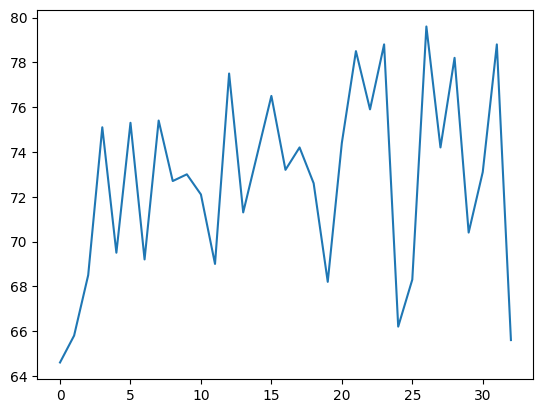

In [32]:
boroughs['Employment rate (%)'].plot();

To create a plot that makes more sense for this data have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for all options.

For the above example, a histogram might work better. You can change the number of `bins` to get the desired output:

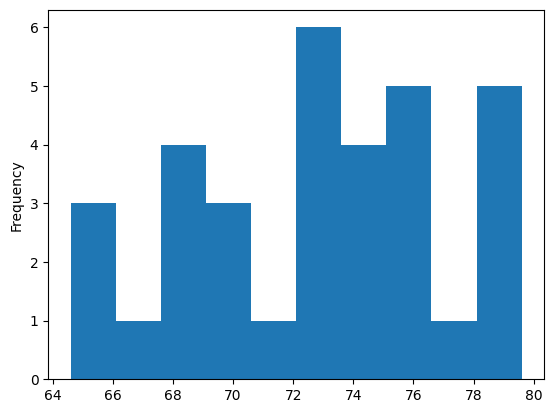

In [33]:
boroughs['Employment rate (%)'].plot.hist(bins=10);

Change the size of the histogram with the `figsize` option:

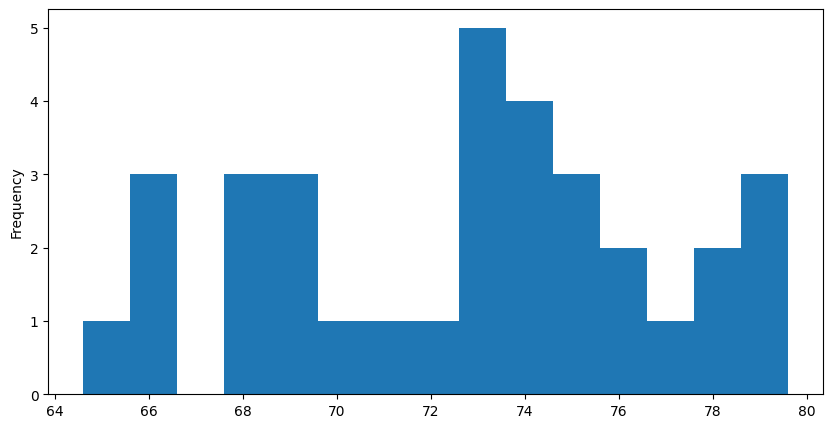

In [34]:
boroughs['Employment rate (%)'].plot.hist(bins=15,figsize=(10,5));

Within the plot command you can select the data directly. The below histogram shows the Employment rate for Outer London only:

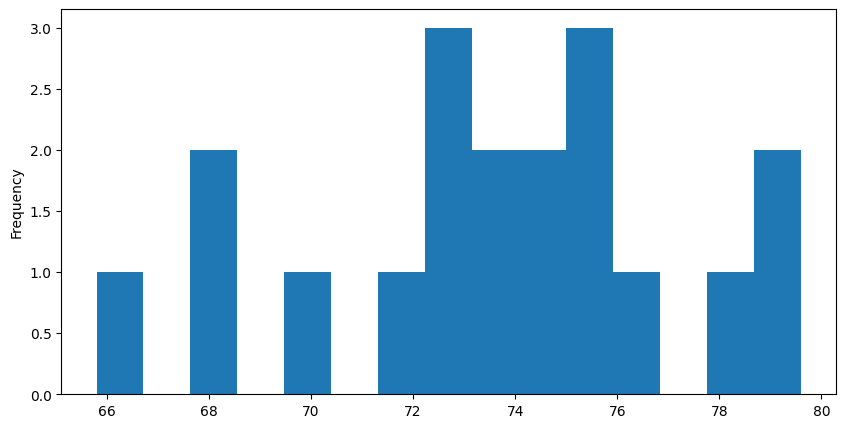

In [35]:
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(bins=15,figsize=(10,5));

To add the Employment rate for Inner London, repeat the plot command with a different selection of the data:

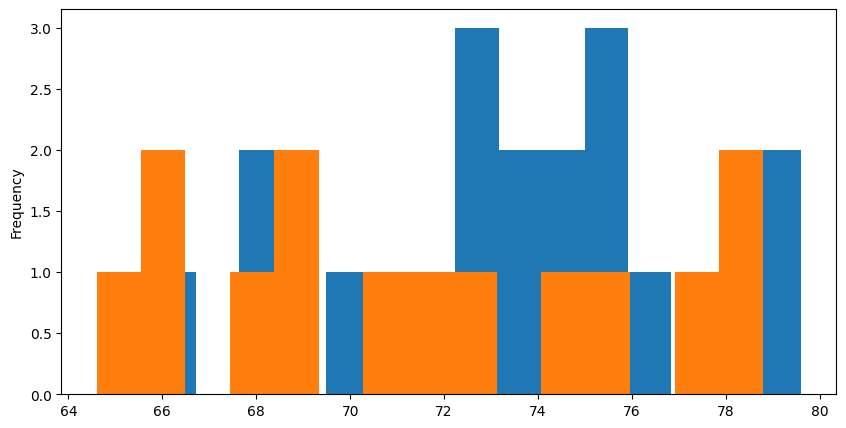

In [36]:
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(bins=15,figsize=(10,5));
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Inner London'].plot.hist(bins=15,figsize=(10,5));

The above plot is difficult to read as the histograms have overlapped. You can fix this by changing the colours and making them transparant.
    
To add a legend each histogram needs to be assigned to an object `ax`. With `legend()` you can then add a legend. With `plt.xlabel()` you can also add a label for the x-axis (this works similar for the y-axis):

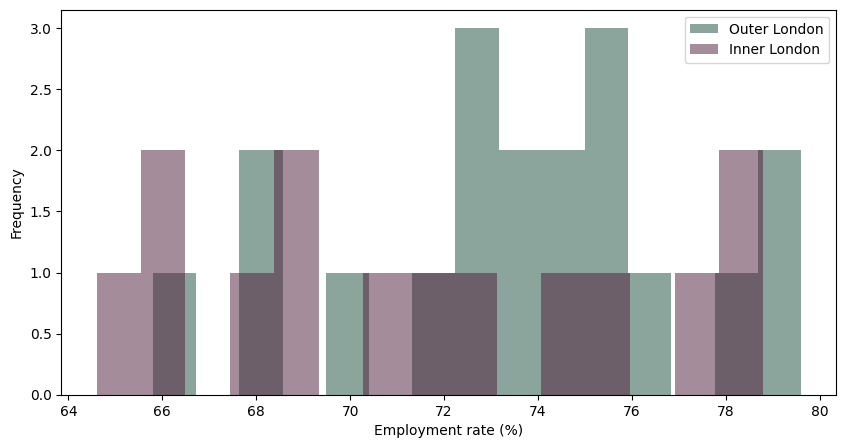

In [37]:
ax = boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#1A4D3B');
ax = boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Inner London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#4D1A39');
ax.legend(['Outer London','Inner London'])
plt.xlabel('Employment rate (%)');

There are various options available to change every aspect of your chart. Below are some examples to get you started.
        


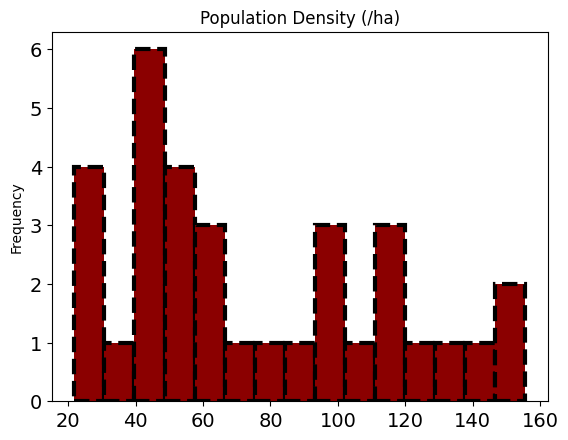

In [38]:
boroughs['Population density (/ha)'].plot.hist(
    bins=15,
    title="Population Density (/ha)",
    legend=False,
    fontsize=14,
    grid=False,
    linestyle='--',
    edgecolor='black',
    color='darkred',
    linewidth=3);

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It is an easy to use visualisation package that works well with Pandas DataFrames.

Below are a few examples using Seaborn.

Refer to this [documentation](https://seaborn.pydata.org/index.html) for information on lots of plots you can create.

In [39]:
# Install seaborn if not already installed
%pip install seaborn

import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Let's look at a distribution plot using `distplot`, which shows a distribution of the data.

Use the `dropna()` function to remove rows and columns with Null/NaN values:

C:\Users\Break\AppData\Local\Temp\ipykernel_39024\2662100469.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boroughs['Population density (/ha)'].dropna());


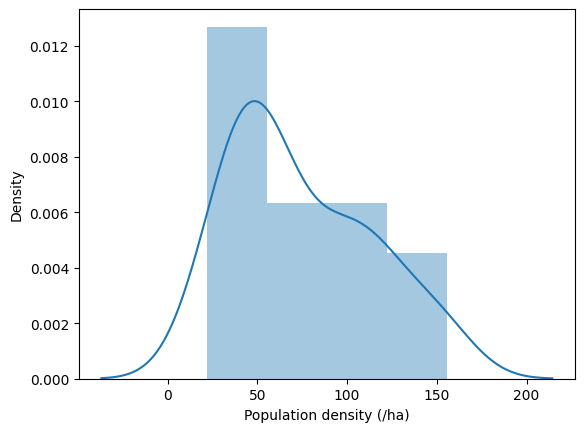

In [40]:
sns.distplot(boroughs['Population density (/ha)'].dropna());

<You can create categorical plots with `catplot`. There are categorical scatter plots, distribution plots and estimate plots. The `kind` parameter selects the function to use, for instance box, violin, swarm ,bar, stripplot and boxen.
    
The default representation in catplot() uses a scatter plot:

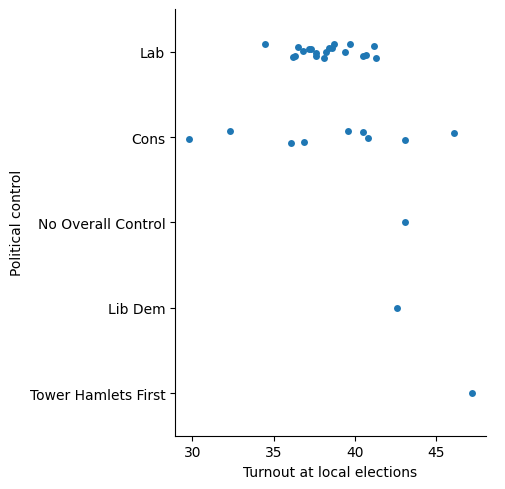

In [41]:
sns.catplot(x='Turnout at local elections', y='Political control', data=boroughs);

Also try `kind="swarm"`, `kind="box"` or `kind="violin"`:

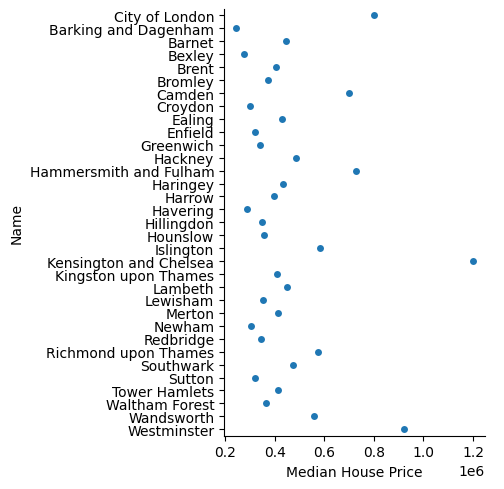

In [42]:
sns.catplot(x='Median House Price', y='Name', kind='swarm', data=boroughs);

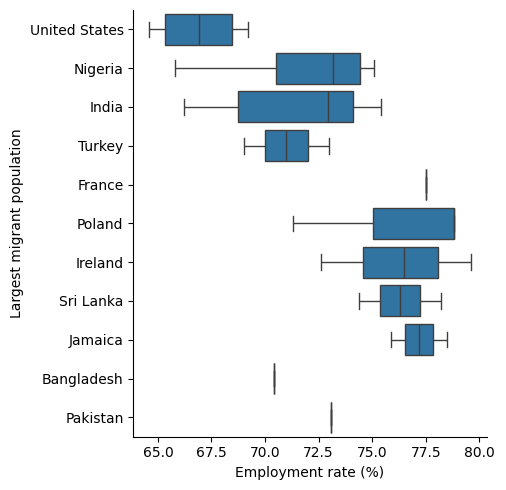

In [43]:
sns.catplot(x='Employment rate (%)', y='Largest migrant population', kind="box", data=boroughs);

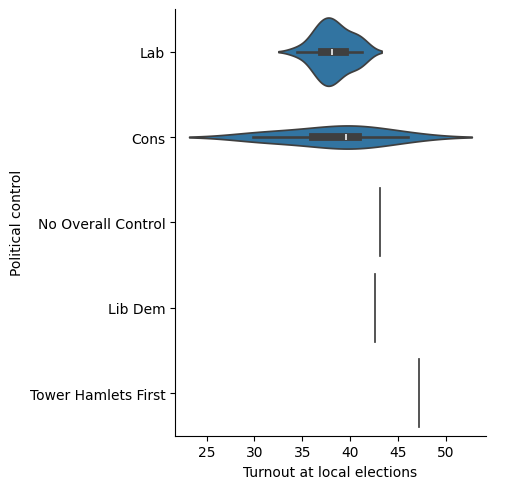

In [44]:
sns.catplot(x='Turnout at local elections', y='Political control', kind="violin", data=boroughs);



**Q11: Create two histograms that compare the Gross Annual pay for Male and Female Employees using `.plot.hist()`**

* To add two histograms to one plot you can repeat `.plot()` in the same cell
* Add a legend by assiging each histogram to an object `ax`, which is used to create a legend

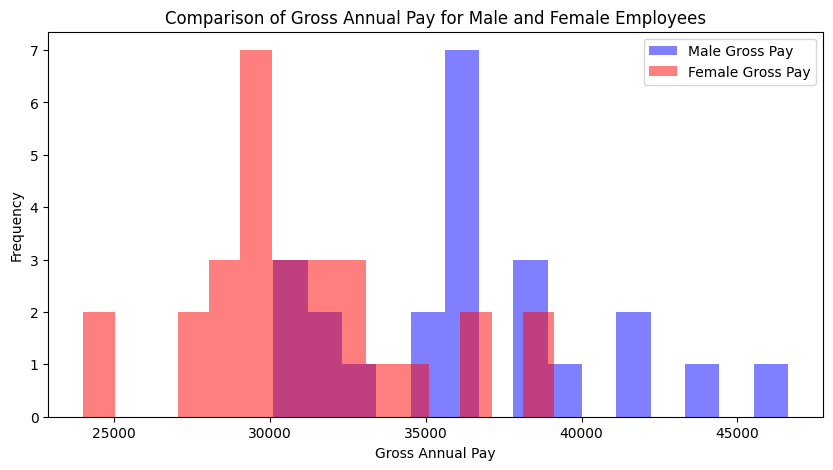

In [45]:
import matplotlib.pyplot as plt

# Create the first histogram for Male Gross Pay
ax = boroughs['Gross Pay (Male)'].plot.hist(bins=15, figsize=(10, 5), alpha=0.5, color='blue')

# Create the second histogram for Female Gross Pay on the same plot
ax = boroughs['Gross Pay (Female)'].plot.hist(bins=15, figsize=(10, 5), alpha=0.5, color='red')

# Add a legend to differentiate the histograms
ax.legend(['Male Gross Pay', 'Female Gross Pay'])

# Add a title and labels for clarity
plt.title('Comparison of Gross Annual Pay for Male and Female Employees')
plt.xlabel('Gross Annual Pay')
plt.ylabel('Frequency')

# Display the plot
plt.show()

**Q12:Create a bar plot comparing the median house prices for different boroughs**

* To customise the size of your maps, use the example of `[fig, ax]`, which customises the figsize for each map in other examples above

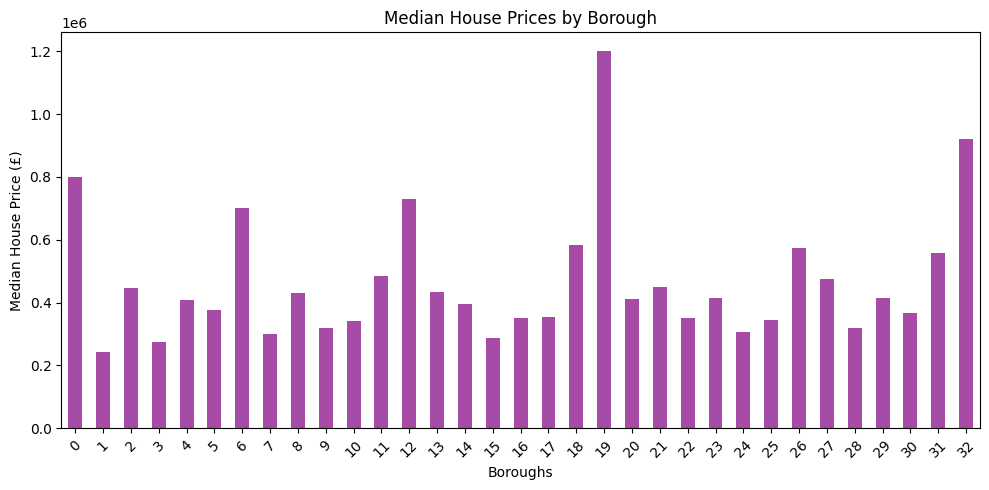

In [46]:
#create a bar plot to compare the median house prices for different boroughs
boroughs['Median House Price'].plot.bar(figsize=(10, 5), color='purple', alpha=0.7)
plt.title('Median House Prices by Borough')
plt.xlabel('Boroughs')
plt.ylabel('Median House Price (£)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()  # Display the plot

**Q13: Considering the observed trends in the London Boroughs dataset, how do economic indicators like employment rate and median house price correlate with social factors like happiness and greenspace percentage in Inner London compared to Outer London?**



-- Is there a significant difference in the correlation between employment rate and happiness score between Inner and Outer London boroughs?

-- Does the percentage of greenspace have a stronger influence on median house prices in Inner London compared to Outer London?print Inner London Correlation and Outer London Correlation values. Explain your Interpretation.

-- Are boroughs with higher employment rates in Inner London also associated with higher happiness scores despite potentially lower greenspace availability?


1. Yes, there is a significant difference. Inner London shows a moderate positive correlation (0.464) between employment rate and happiness score, suggesting that boroughs with higher employment tend to report higher happiness.

Outer London has a very weak correlation (0.050), indicating almost no relationship between employment and happiness in those boroughs.

This means employment is more strongly associated with happiness in Inner London than in Outer London.

2. Both regions show weak correlations (Inner: -0.092, Outer: 0.071), so greenspace doesn’t significantly impact house prices.


3. In Inner London, higher employment rates are tied to higher happiness, even with less greenspace. Economic stability seems more important for well-being than environmental space.





In [47]:
# Split the data into Inner and Outer London
inner = boroughs[boroughs['Inner/Outer'] == 'Inner London']
outer = boroughs[boroughs['Inner/Outer'] == 'Outer London']

# Calculate correlations for Inner London
inner_corr_employment_happiness = inner['Employment rate (%)'].corr(inner['Happiness score'])
inner_corr_greenspace_house = inner['Greenspace (%)'].corr(inner['Median House Price'])

# Calculate correlations for Outer London
outer_corr_employment_happiness = outer['Employment rate (%)'].corr(outer['Happiness score'])
outer_corr_greenspace_house = outer['Greenspace (%)'].corr(outer['Median House Price'])

print("Inner London - Employment vs Happiness Correlation:", inner_corr_employment_happiness)
print("Inner London - Greenspace vs House Price Correlation:", inner_corr_greenspace_house)
print("Outer London - Employment vs Happiness Correlation:", outer_corr_employment_happiness)
print("Outer London - Greenspace vs House Price Correlation:", outer_corr_greenspace_house)


Inner London - Employment vs Happiness Correlation: 0.46432347609112595
Inner London - Greenspace vs House Price Correlation: -0.09199414583591416
Outer London - Employment vs Happiness Correlation: 0.04995759854803409
Outer London - Greenspace vs House Price Correlation: 0.07066102799826768
